In [1]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
co = pymysql.connect(host='132.248.1.102', db='3MdB', user='OVN_user', passwd='oiii5007') 

In [3]:
res = pd.read_sql("""SELECT 
HE_2__4686A / H__1__4861A as He2, 
TOTL__3727A / H__1__4861A as O2, 
O__3__5007A / H__1__4861A as O3, 
O__1__6300A / H__1__4861A as O1, 
(S_II__6716A +  S_II__6731A )/ H__1__4861A as S2, 
OXYGEN as O,
substr(com3, 6) as age,
hbfrac,
logU_mean
FROM tab 
WHERE ref like 'BOND' 
""", 
con=co)

In [4]:
print(len(res))

31500


In [5]:
res[0:10]

,He2,O2,O3,O1,S2,O,age,hbfrac,logU_mean
0,0.000002,0.774138,0.020689,0.054497,0.259202,-4.6,5000000.0,1.000000,-4.09631
1,0.000006,1.175851,0.105805,0.006174,0.144826,-4.6,5000000.0,0.180864,-3.51972
2,0.000003,1.039941,0.051601,0.010309,0.178352,-4.6,5000000.0,0.393601,-3.74787
3,0.000003,0.288868,0.026709,0.007602,0.051574,-5.2,6000000.0,1.000000,-3.55897
4,0.000003,3.969588,0.082828,0.349672,1.846676,-3.6,3000000.0,1.000000,-4.05397
5,0.000003,0.952467,0.036135,0.014129,0.192571,-4.6,5000000.0,0.569319,-3.85687
6,0.000015,0.361518,0.120669,0.000613,0.022439,-5.2,6000000.0,0.185133,-3.05364
7,0.000002,0.864293,0.026238,0.021961,0.208129,-4.6,5000000.0,0.787870,-3.95936
8,0.000013,4.702920,0.394895,0.031671,0.895401,-3.6,3000000.0,0.189526,-3.48047
9,0.000007,0.362397,0.064651,0.001146,0.031908,-5.2,6000000.0,0.396378,-3.27183


In [6]:
# res.age is a string, tranform it to float:
res = res.apply(pd.to_numeric, errors='ignore')

In [7]:
mask1 = np.abs((res['He2'] - 0.15)/0.15) < 0.2
print(mask1.sum())

96


In [8]:
res[mask1][0:10]

,He2,O2,O3,O1,S2,O,age,hbfrac,logU_mean
1222,0.178013,0.023284,8.231012,6.995372e-08,0.000318,-3.4,4000000.0,0.386391,-0.047426
1483,0.146972,0.031275,11.445275,5.843562e-08,0.000309,-3.2,5000000.0,0.390901,0.108736
1854,0.137328,0.145093,5.177771,2.832352e-05,0.033525,-3.6,4000000.0,0.188321,-1.939820
2845,0.152096,0.036481,3.943727,1.389901e-06,0.004892,-3.6,4000000.0,0.196136,-1.384250
2926,0.179836,0.020256,7.648235,5.927044e-16,0.000039,-3.2,4000000.0,0.196598,0.346165
3149,0.137289,0.052165,5.980162,2.115571e-06,0.005536,-3.8,4000000.0,0.190975,-1.469400
3362,0.121290,0.185519,6.227059,3.727773e-05,0.033017,-3.8,4000000.0,0.196245,-2.013340
4267,0.159827,0.047773,5.273438,1.770467e-06,0.005849,-3.6,4000000.0,0.184492,-1.384790
4326,0.133234,0.129056,4.567341,2.668205e-05,0.031553,-3.6,4000000.0,0.196256,-1.943860
4668,0.143130,0.053416,6.337694,2.033312e-06,0.005475,-3.8,4000000.0,0.179102,-1.457420


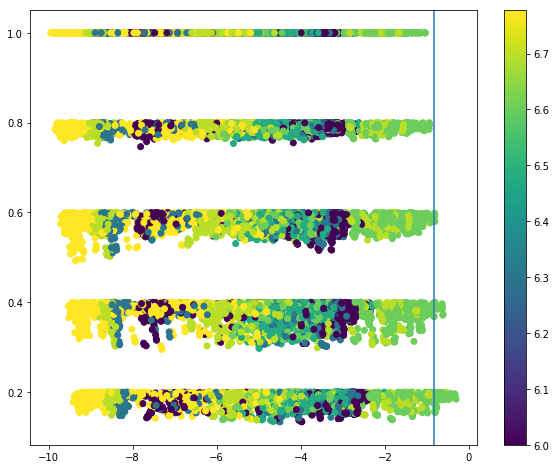

In [9]:
fig, ax = plt.subplots(figsize=(10,8))
sc = ax.scatter(np.log10(res['He2']), res['hbfrac'], c=np.log10(res['age']))
cb = fig.colorbar(sc)
ax.axvline(np.log10(0.15));

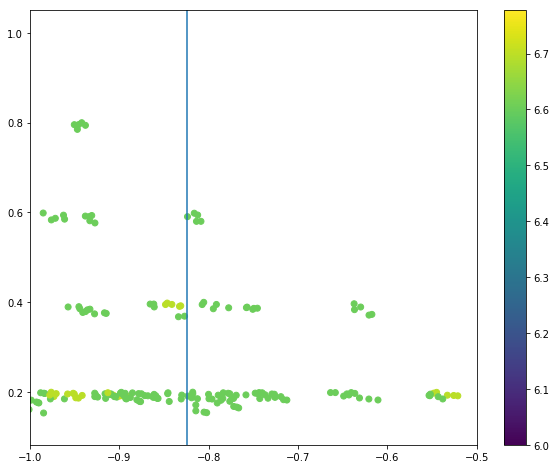

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
sc = ax.scatter(np.log10(res['He2']), res['hbfrac'], c=np.log10(res['age']))
ax.set_xlim((-1, -0.5))
cb = fig.colorbar(sc)
ax.axvline(np.log10(0.15));

have a look at  http://adsabs.harvard.edu/abs/2009MNRAS.398..451M Figs. 8 and 10

## Other example

In [11]:
res2 = pd.read_sql("""SELECT 
OXYGEN as O, 
T_OXYGEN_vol_2 as TOpp, 
T_NITROGEN_vol_1 as TNp, 
logU_mean as logU 
FROM v_3MdB 
WHERE ref = 'PNe_2014' AND com6 = 1""", 
                  con=co)

In [12]:
print(len(res2))

84237


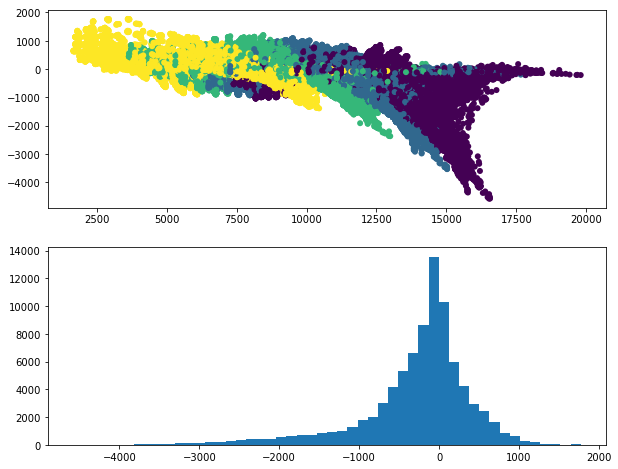

In [13]:
f, (ax1, ax2) = plt.subplots(2,1, figsize=(10,8))
ax1.scatter(res2['TOpp'], res2['TNp']-res2['TOpp'], c=res2['O'], edgecolor='None') 
ax2.hist(res2['TNp']-res2['TOpp'], bins=50);

In [14]:
co.close()